In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model2 = LinearRegression(fit_intercept=False)

In [2]:
data1 = pd.read_csv('/home/soubhik/Documents/Winkl-ML/Price_prediction/notebooks/quoted_price.csv')
display(data1)

,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price
0,0,7447.0,3.0,270387.0,25316.0,1.71,1500.0
1,1,7447.0,11.0,270387.0,25316.0,1.71,1000.0
2,2,7447.0,12.0,270387.0,25316.0,1.71,1500.0
3,3,12622.0,1.0,304378.0,12161.0,2.51,500.0
4,4,12622.0,2.0,304378.0,12161.0,2.51,200.0
...,...,...,...,...,...,...,...
51196,51196,18263.0,2.0,441623.0,1417.0,4.35,300.0
51197,51197,18263.0,3.0,441623.0,1417.0,4.35,800.0
51198,51198,18263.0,11.0,441623.0,1417.0,4.35,1000.0
51199,51199,18263.0,12.0,441623.0,1417.0,4.35,850.0


In [3]:
def instagram_price(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    video_rate = 0.24583049*followers + 0.01875384*eng_num
    if followers <= 10000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 10000 < followers <=50000:
        story_rate = video_rate*0.6
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.35
    if 50000 < followers <=100000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 100000 < followers <=300000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.6
        carousel_rate = video_rate*0.65
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 300000 <followers <= 800000 :
        story_rate = video_rate*0.3
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.45
    if 800000 <followers <= 1000000  :
        story_rate = video_rate*0.4
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.50
    if 1000000 <followers <= 3000000  :
        story_rate = video_rate*0.25
        image_rate = video_rate*0.55
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*1.3
        video_rate = video_rate*1.3
    if followers > 3000000 :
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
    if followers <=5000000:
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if followers>5000000:
        rate_dec = ((followers/1000000)-(5000000/1000000))*7.87272727
        video_rate = 0.24583049*5000000 + 0.01875384*eng_num
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
        base_amount = base_amount*(1+rate_dec/100)
    if eng_rate > 2:
        base_amount = base_amount*(100+(1.14055527*eng_rate))/100
    if num_post>=3:
        discount_amount = base_amount*0.75
        return discount_amount
    else:
        return base_amount
def plot(dataframe, xaxis, yaxis, Title = "No Title"):
    '''
    yaxis is array of results
    xaxis is single column
    '''
    plt.figure(figsize=(10,10))
    for y in yaxis:
        plt.plot(dataframe[xaxis].tolist(), dataframe[y].tolist(),label="{} vs {}".format(xaxis,y))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(Title)
    plt.legend()
    plt.grid(True)
    plt.show()
def model_info(model,X,y):
    print("coefficient: ",model.coef_)
    print("intercept: ",model.intercept_)
    print("Score: ",model.score(X,y))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, model.predict(X)))
    print('Mean Squared Error:', metrics.mean_squared_error(y, model.predict(X)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, model.predict(X))))
    print('R2 Score:', np.sqrt(metrics.r2_score(y, model.predict(X))))

/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Data length:  2767
Maximum payable:  1687.483507314405
coefficient:  [0.08580218 0.00947688]
intercept:  0.0
Score:  -0.11570224837882592
Mean Absolute Error: 348.2294414635162
Mean Squared Error: 277492.86543506186
Root Mean Squared Error: 526.7759157697529
R2 Score: nan


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in sqrt


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,eng_num,predicted,new_prediction
36085,36085,14752.0,2.0,369851.0,2001.0,14.45,300.0,289.1445,289.647176,174.430347
36761,36761,14900.0,2.0,374300.0,2001.0,12.07,400.0,241.5207,282.389079,173.979022
7109,7109,13157.0,2.0,316571.0,2002.0,13.66,100.0,273.4732,287.378834,174.367634
45601,45601,17064.0,2.0,412202.0,2002.0,3.78,500.0,75.6756,257.425603,172.493130
26729,26729,21315.0,2.0,505256.0,2003.0,14.30,100.0,286.4290,289.478062,174.576217
...,...,...,...,...,...,...,...,...,...,...
21910,21910,1456.0,2.0,287360.0,9994.0,1.21,500.0,120.9274,1229.548885,858.652986
7731,7731,19155.0,2.0,461681.0,9995.0,2.27,250.0,226.8865,1262.528041,859.742950
3580,3580,18619.0,2.0,449701.0,9996.0,16.73,500.0,1672.3308,1481.781111,873.527055
30056,30056,11482.0,2.0,292772.0,9996.0,1.86,500.0,185.9256,1230.404198,859.440571


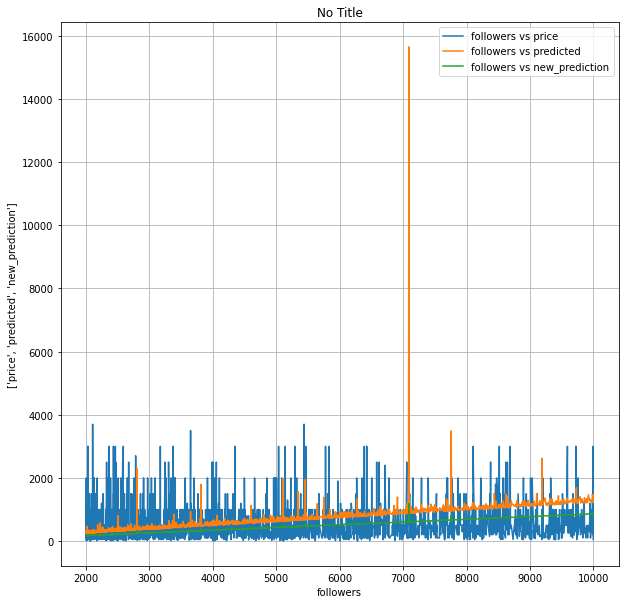

In [4]:
# <10K Image
data2 = data1[(data1.followers > 2000) & (data1.followers < 10000) & (data1.campaign_post_format_id == 2) & (data1.price < 4000) & (data1.avg_engangement != 0)]
data2['eng_num'] = data2.apply(lambda x: (x.followers*x.avg_engangement)/100,axis=1)
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(10000,30,0,1,0,0,0))
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','eng_num']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  3280
Maximum payable:  8437.417536572026


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

coefficient:  [0.03517652 0.01662693]
intercept:  0.0
Score:  0.0033953727976773207
Mean Absolute Error: 511.5668914461798
Mean Squared Error: 702548.3765822004
Root Mean Squared Error: 838.1815892646416
R2 Score: 0.058269827506843716


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,eng_num,predicted,new_prediction
30247,30247,14189.0,2.0,349953.0,10003.0,7.22,200.0,722.2166,1338.099761,363.879012
42016,42016,16290.0,2.0,395559.0,10006.0,4.86,300.0,486.2916,1302.876632,360.061833
28270,28270,9970.0,2.0,347656.0,10007.0,2.22,200.0,222.1554,1263.293063,355.705235
43103,43103,13368.0,2.0,320156.0,10008.0,5.57,300.0,557.4456,1313.844176,361.315258
46554,46554,17258.0,2.0,419217.0,10009.0,4.06,500.0,406.3654,1291.214620,358.838435
...,...,...,...,...,...,...,...,...,...,...
39480,39480,15642.0,2.0,387744.0,49742.0,4.21,500.0,2094.1382,6428.210228,1784.569733
27649,27649,10404.0,2.0,301808.0,49765.0,2.03,1000.0,1010.2295,6268.195057,1767.356719
13357,13357,2862.0,2.0,9999.0,49801.0,0.38,1000.0,189.2438,6123.076640,1754.972603
20640,20640,4571.0,2.0,6299.0,49859.0,0.75,1000.0,373.9425,6131.937629,1760.083814


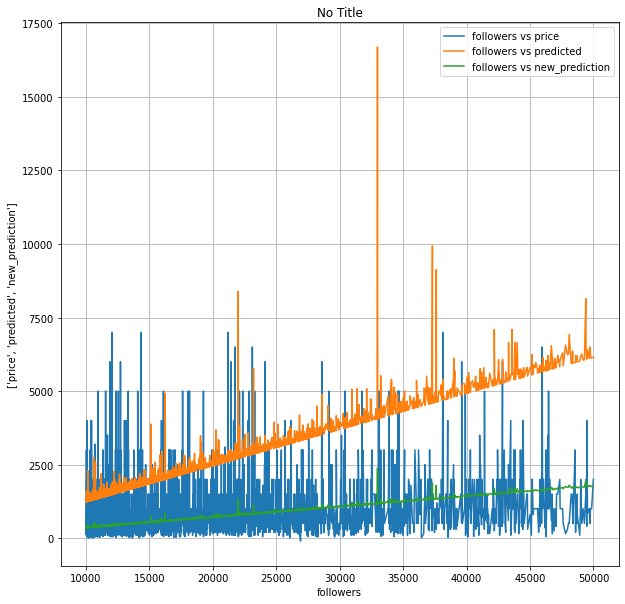

In [5]:
# 10K - 50K Image
data2 = data1[(data1.followers >10000) & (data1.followers < 50000) & (data1.campaign_post_format_id == 2) & (data1.price < 7500) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(50000,30,0,1,0,0,0))
data2['eng_num'] = data2.apply(lambda x: (x.followers*x.avg_engangement)/100,axis=1)
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','eng_num']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  520
Maximum payable:  16874.83507314405


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

coefficient:  [0.02752566 0.00921316]
intercept:  0.0
Score:  -0.003085567020073343
Mean Absolute Error: 1295.5755610253661
Mean Squared Error: 3444286.524846818
Root Mean Squared Error: 1855.878908993477
R2 Score: nan


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in sqrt


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,eng_num,predicted,new_prediction
6099,6099,5593.0,2.0,93307.0,50014.0,2.03,1000.0,1015.2842,6299.558074,1386.022252
42845,42845,5695.0,2.0,269278.0,50016.0,3.86,500.0,1930.6176,6437.285573,1394.510413
32171,32171,8430.0,2.0,28223.0,50028.0,1.62,1500.0,810.4536,6156.803435,1384.520475
36139,36139,14758.0,2.0,370117.0,50066.0,1.43,300.0,715.9438,6160.588004,1384.695716
30257,30257,11385.0,2.0,291824.0,50084.0,1.15,2000.0,575.9660,6161.487918,1383.901541
...,...,...,...,...,...,...,...,...,...,...
420,420,1368.0,2.0,12080.0,99282.0,1.34,1500.0,1330.3788,12215.746210,2745.059406
1935,1935,4241.0,2.0,276329.0,99430.0,0.80,5000.0,795.4400,12228.921588,2744.204729
51041,51041,10414.0,2.0,74468.0,99650.0,0.44,1500.0,438.4600,12252.615569,2746.971461
16122,16122,8527.0,2.0,145654.0,99800.0,0.33,500.0,329.3400,12270.029646,2750.094970


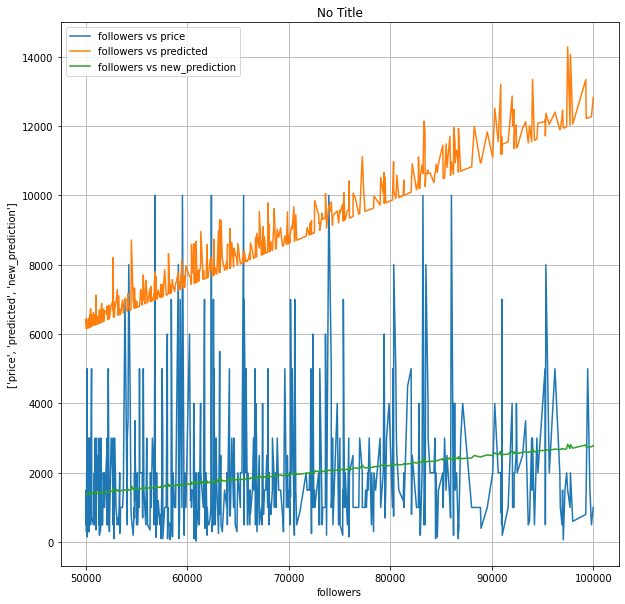

In [82]:
# 50K - 100K Image
data2 = data1[(data1.followers > 50000) & (data1.followers < 100000) & (data1.campaign_post_format_id == 2) & (data1.price < 15000) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(100000,30,0,1,0,0,0))
data2['eng_num'] = data2.apply(lambda x: (x.followers*x.avg_engangement)/100,axis=1)
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','eng_num']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  354
Maximum payable:  60749.406263318575


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

coefficient:  [0.01687308 0.10067394]
intercept:  0.0
Score:  0.09550766462536353
Mean Absolute Error: 2111.215170678882
Mean Squared Error: 7246052.4753069375
Root Mean Squared Error: 2691.84926682512
R2 Score: 0.3090431436310528


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,eng_num,predicted,new_prediction
29253,29253,5481.0,2.0,508.0,100017.0,0.38,2500.0,380.0646,14756.613473,1725.857172
35103,35103,14657.0,2.0,99284.0,100049.0,0.37,250.0,370.1813,14761.222209,1725.402119
6784,6784,19083.0,2.0,334424.0,100201.0,5.00,1500.0,5010.0500,15681.906574,2195.080674
46368,46368,4173.0,2.0,211037.0,100405.0,2.26,5000.0,2269.1530,15217.497077,1922.585891
5532,5532,18920.0,2.0,457215.0,100458.0,4.28,800.0,4299.6024,15591.447705,2127.893499
...,...,...,...,...,...,...,...,...,...,...
43550,43550,16650.0,2.0,396025.0,288738.0,1.67,2500.0,4821.9246,42642.620174,5357.340725
16362,16362,11266.0,2.0,135009.0,289597.0,0.34,5000.0,984.6298,42726.142801,4985.519125
13000,13000,1159.0,2.0,269759.0,293490.0,1.87,8000.0,5488.2630,43351.029910,5504.604498
47736,47736,17461.0,2.0,45576.0,296013.0,2.07,10000.0,6127.4691,44762.812338,5611.526666


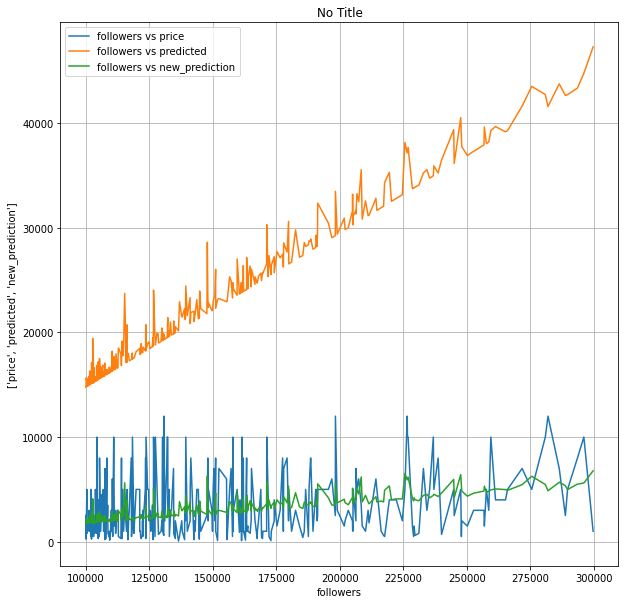

In [83]:
# 100K - 300K Image
data2 = data1[(data1.followers > 100000) & (data1.followers < 300000) & (data1.campaign_post_format_id == 2) & (data1.price < 15000) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(300000,30,0,1,0,0,0))
data2['eng_num'] = data2.apply(lambda x: (x.followers*x.avg_engangement)/100,axis=1)
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','eng_num']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  83
Maximum payable:  188998.15281921334
coefficient:  [0.01595681 0.08665652]
intercept:  0.0
Score:  0.1123786091046679
Mean Absolute Error: 6127.564851843665
Mean Squared Error: 63772350.8212973
Root Mean Squared Error: 7985.7592513985355
R2 Score: 0.3352291889210543


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,eng_num,predicted,new_prediction
17731,17731,9100.0,2.0,14911.0,300077.0,2.45,5000.0,7351.8865,53179.805502,5425.359805
21362,21362,4808.0,2.0,221474.0,301489.0,0.14,1500.0,422.0846,51886.173015,4847.378325
12729,12729,7553.0,2.0,270511.0,306490.0,0.63,999.0,1930.8870,52766.558898,5057.925879
32011,32011,21236.0,2.0,321076.0,306711.0,2.86,10000.0,8771.9346,54619.804902,5654.273688
31277,31277,21870.0,2.0,270106.0,309973.0,4.52,5000.0,14010.7796,56283.853045,6160.304853
...,...,...,...,...,...,...,...,...,...,...
5416,5416,11324.0,2.0,249444.0,671651.0,2.98,10000.0,20015.1998,119778.638900,12451.853223
45527,45527,8368.0,2.0,64929.0,674289.0,1.49,15000.0,10046.9061,116164.449339,11630.129673
33459,33459,8547.0,2.0,292537.0,678634.0,1.56,10000.0,10586.6904,116919.228894,11746.237829
46147,46147,11197.0,2.0,290430.0,695229.0,2.54,12000.0,17658.8166,123340.340888,12623.886871


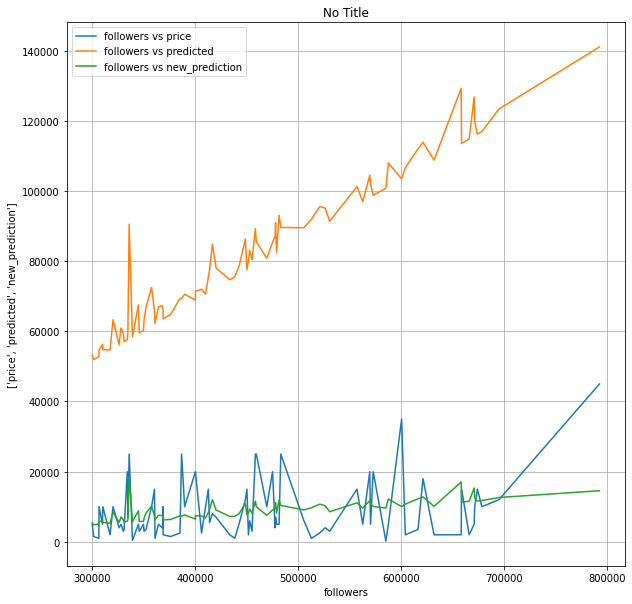

In [84]:
# 300K - 800K Image
data2 = data1[(data1.followers > 300000) & (data1.followers < 800000) & (data1.campaign_post_format_id == 2) & (data1.price < 100000) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(800000,30,0,1,0,0,0))
data2['eng_num'] = data2.apply(lambda x: (x.followers*x.avg_engangement)/100,axis=1)
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','eng_num']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  8
Maximum payable:  236247.69102401668
coefficient:  [-1.44510777e-02  1.43859257e+04]
intercept:  0.0
Score:  0.7958785986518677
Mean Absolute Error: 16083.033799016144
Mean Squared Error: 401864008.9041355
Root Mean Squared Error: 20046.546059212684
R2 Score: 0.8921202826143276


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,predicted,new_prediction
28803,28803,11570.0,2.0,287402.0,808346.0,4.63,15000.0,146964.152398,54925.365353
17918,17918,1200.0,2.0,41605.0,832907.0,1.79,5000.0,143523.476318,13714.403329
15162,15162,1271.0,2.0,261338.0,834643.0,9.38,150000.0,160129.951009,122878.492634
39372,39372,1253.0,2.0,426595.0,856477.0,2.93,30000.0,152649.466602,29773.746773
45064,45064,10454.0,2.0,130789.0,867039.0,0.49,15000.0,149257.008419,-5480.544318
49934,49934,17976.0,2.0,237004.0,869368.0,1.77,20000.0,149804.019417,12899.784071
33001,33001,14410.0,2.0,216397.0,911937.0,1.33,15000.0,157086.566296,5954.808820
50494,50494,18108.0,2.0,435714.0,964285.0,5.56,50000.0,177206.698275,66050.789691


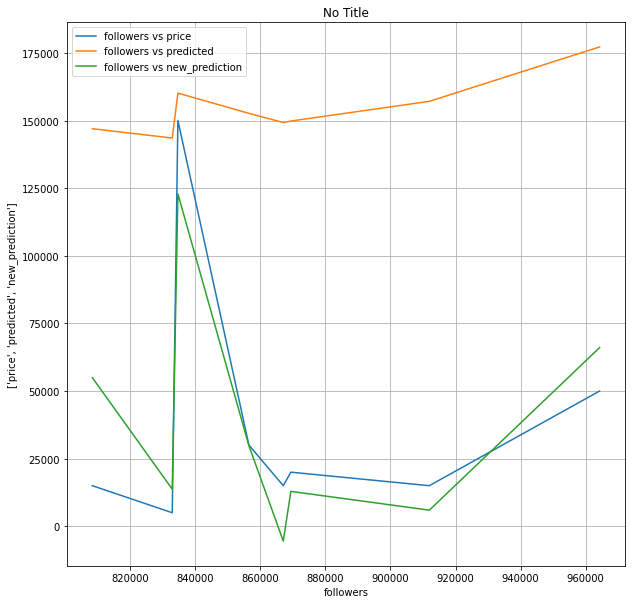

In [78]:
# 800K - 1M Image
data2 = data1[(data1.followers > 800000) & (data1.followers < 1000000) & (data1.campaign_post_format_id == 2) & (data1.price < 200000) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(1000000,30,0,1,0,0,0))
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','avg_engangement']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])

Data length:  19
Maximum payable:  556869.5574137537
coefficient:  [-1.41173508e-06  5.81159345e+03]
intercept:  0.0
Score:  0.9065739951653181
Mean Absolute Error: 2109.6129179140717
Mean Squared Error: 16011743.3752087
Root Mean Squared Error: 4001.4676526505496
R2 Score: 0.9521417936238898


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/soubhik/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Unnamed: 0,campaign_profile_id,campaign_post_format_id,insta_user_id,followers,avg_engangement,price,predicted,new_prediction
32703,32703,14362.0,2.0,419024.0,1186148.0,0.24,2200.0,1.604046e+05,1393.107902
303,303,18266.0,2.0,334749.0,1193156.0,2.85,15000.0,1.669288e+05,16561.356922
5664,5664,8007.0,2.0,300580.0,1291855.0,5.59,35000.0,1.865962e+05,32484.983648
4926,4926,18555.0,2.0,41312.0,1370450.0,2.07,15000.0,1.899683e+05,12028.063736
19934,19934,13654.0,2.0,236758.0,2227943.0,7.34,40000.0,3.282792e+05,42653.950683
16317,16317,9342.0,2.0,94176.0,2338992.0,1.18,5000.0,3.165322e+05,6854.378238
16912,16912,6428.0,2.0,165659.0,2795922.0,4.26,25000.0,3.976833e+05,24753.441010
13928,13928,13340.0,2.0,222571.0,3004007.0,3.44,30000.0,3.077859e+05,19987.640618
1728,1728,18386.0,2.0,215644.0,117853078.0,2.31,150.0,5.195106e+06,13258.403553
5438,5438,18746.0,2.0,220249.0,393809817.0,0.13,100.0,1.566277e+07,199.552016


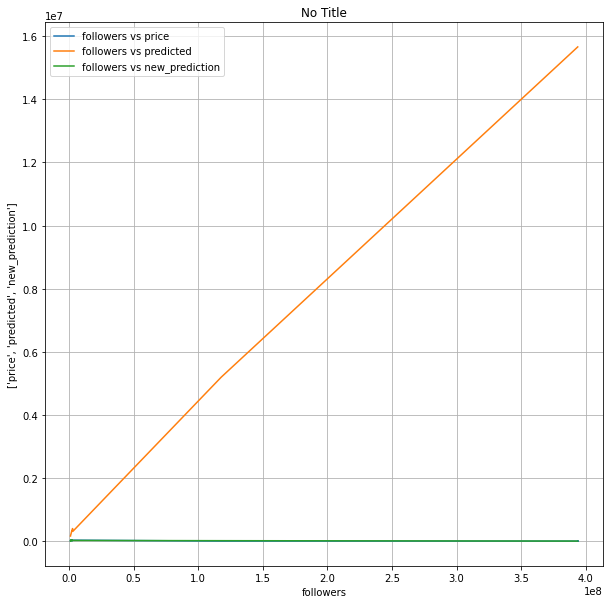

In [80]:
# 1M - 3M Image
data2 = data1[(data1.followers > 1000000)& (data1.campaign_post_format_id == 2) & (data1.price < 1000000) & (data1.avg_engangement != 0)]
print("Data length: ",len(data2))
print("Maximum payable: ", instagram_price(3000000,30,0,1,0,0,0))
data2['predicted'] = [0]*len(data2)
for d2 in data2.index:
    data2.loc[d2,'predicted'] = instagram_price(data2.loc[d2,'followers'],data2.loc[d2,'avg_engangement'],0,1,0,0,0)
data2 = data2.sort_values('followers')

X = data2[['followers','avg_engangement']]
y = data2['price'].values
model2.fit(X,y)
model_info(model2,X,y)
new_price = model2.predict(X)
data2['new_prediction'] = [i for i in new_price]

display(data2)
plot(data2,'followers',['price','predicted', 'new_prediction'])